In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.head

<bound method NDFrame.head of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex     age  sibsp  parch  ticket      fare    cabin embarke

In [4]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [5]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

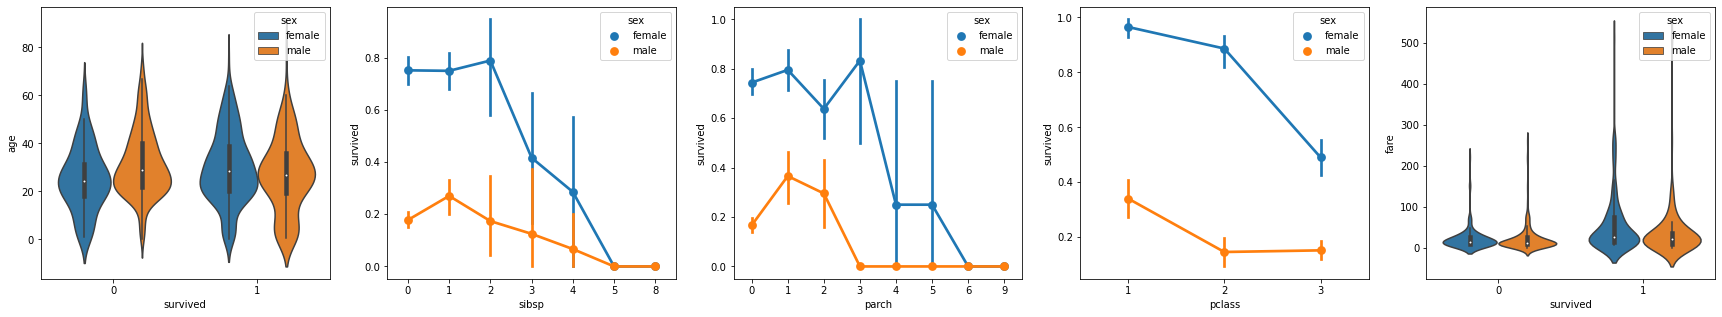

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [8]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [11]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [13]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [14]:
data.dtypes

sex            int64
pclass         int64
age          float64
relatives      int64
fare         float64
survived       int64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()

In [22]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 924us/step - loss: 0.6924 - accuracy: 0.5706
Epoch 2/50
27/27 [==============================] - 0s 739us/step - loss: 0.6907 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 923us/step - loss: 0.6875 - accuracy: 0.5933
Epoch 4/50
27/27 [==============================] - 0s 997us/step - loss: 0.6807 - accuracy: 0.7249
Epoch 5/50
27/27 [==============================] - 0s 850us/step - loss: 0.6681 - accuracy: 0.7739
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.7691
Epoch 7/50
27/27 [==============================] - 0s 886us/step - loss: 0.6311 - accuracy: 0.7667
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7667
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.7703
Epoch 10/50
27/27 [==============================] - 0s 739us/step - loss: 0.5873 - accuracy: 0.7739
Epoch

In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

0.6124401913875598
